<a href="https://colab.research.google.com/github/RejwankabirHamim/Machine-Learning-Sessional-/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/leibnitiz/kmeans.csv')

In [ ]:
data

,ID,x,y,z
0,1,3.4,2.5,10.4
1,2,12.3,1.0,3.0
2,3,5.0,13.6,23.5
3,4,8.0,20.5,21.2
4,5,2.0,50.3,15.0
5,6,5.3,30.4,48.2
6,7,13.6,23.5,66.3
7,8,20.5,21.2,25.0
8,9,50.3,15.0,38.2
9,10,30.4,48.2,41.3


In [ ]:
xx = data['x'].values
yy = data['y'].values
zz= data['z'].values


In [ ]:
def assign_clusters(x, y,z, centroids):
    clusters = [[] for i in range(len(centroids))]
    for i in range(len(x)):
        dist=[]
        for centroid in centroids:
            dist.append(math.sqrt((x[i] - centroid[0]) ** 2 + (y[i] - centroid[1]) ** 2+(z[i] - centroid[2]) ** 2))
        mn = dist.index(min(dist))
        clusters[mn].append((x[i],y[i],z[i]))
    return clusters

In [ ]:
def update_centroids(clusters):
    centroids = []
    for cluster in clusters:

        sum_x = 0
        sum_y = 0
        sum_z = 0
        for point in cluster:
          sum_x += point[0]
          sum_y += point[1]
          sum_z += point[2]
          centroid_x = sum_x / len(cluster)
          centroid_y = sum_y / len(cluster)
          centroid_z = sum_z / len(cluster)

        centroids.append((centroid_x,centroid_y, centroid_z))
    return centroids

In [ ]:
def k_means_clustering(X, Y,Z, K,centroids):
    prev_centroids = []
    while centroids != prev_centroids:
        clusters = assign_clusters(X, Y,Z, centroids)
        prev_centroids = centroids
        centroids = update_centroids(clusters)
        colors = ['red', 'blue','green','pink',"cyan",'silver','violet',"orange","green","violet","aqua","cyan"]
        fig=plt.figure(figsize=(8, 8))

        counter = 0
        ax = fig.add_subplot(111, projection='3d')
        for cluster in clusters:
            for point in cluster:
                ax.scatter(point[0], point[1],point[2], c=colors[counter], marker='o')
            counter += 1

        for centroid in centroids:
            ax.scatter(centroid[0], centroid[1],centroid[2], c='black', marker='x', s=40)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('K-means Clustering')
        plt.show()
    return clusters, centroids


In [ ]:
k = int(input("Enter Number of cluster: "))

Enter Number of cluster: 5


In [ ]:
centroid = []
for i in range(k):
    ind = i
    centroid.append((xx[ind],yy[ind],zz[ind]))

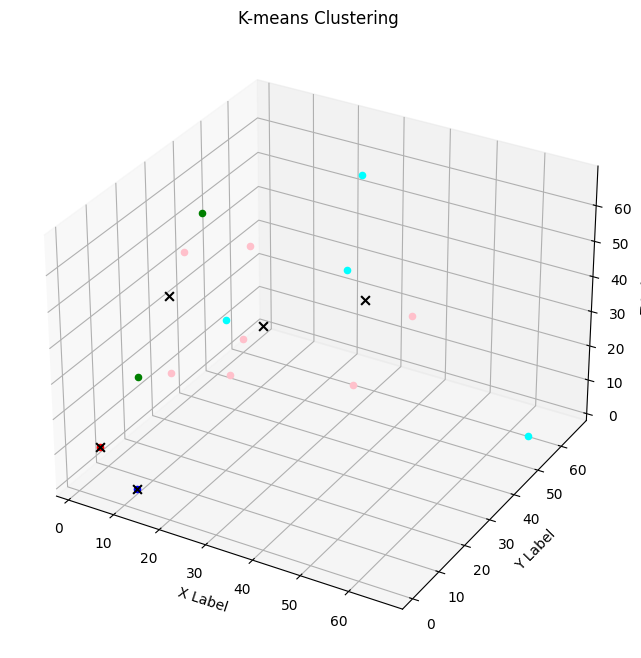

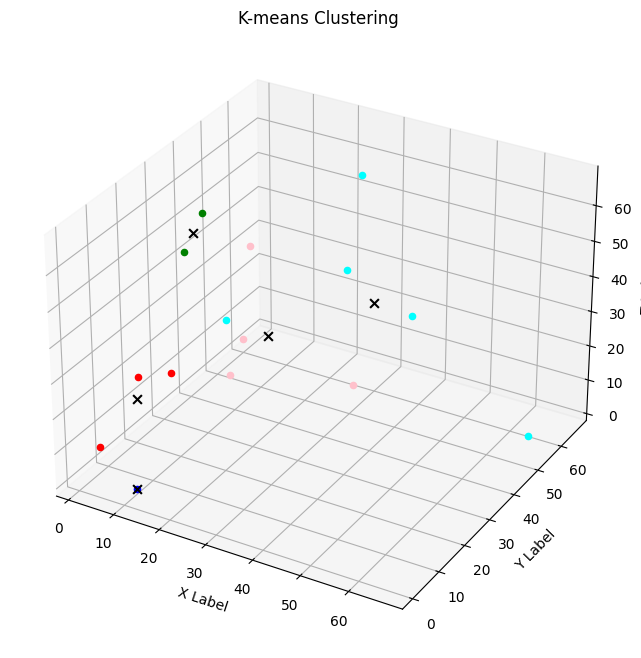

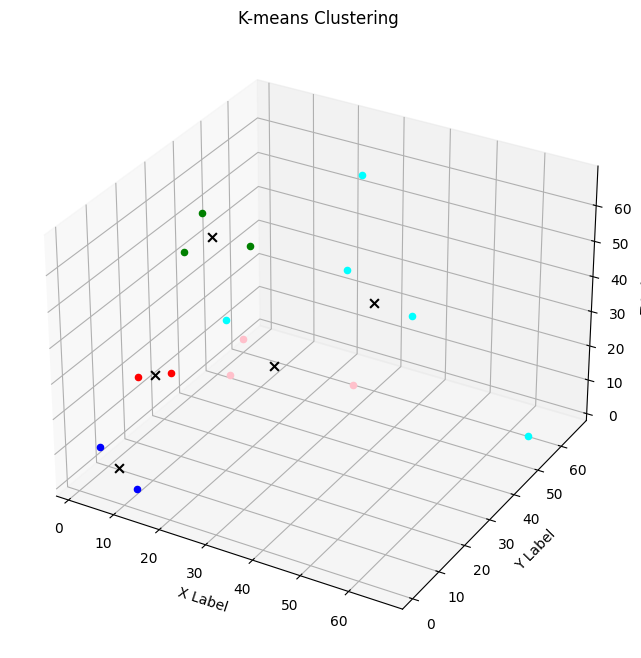

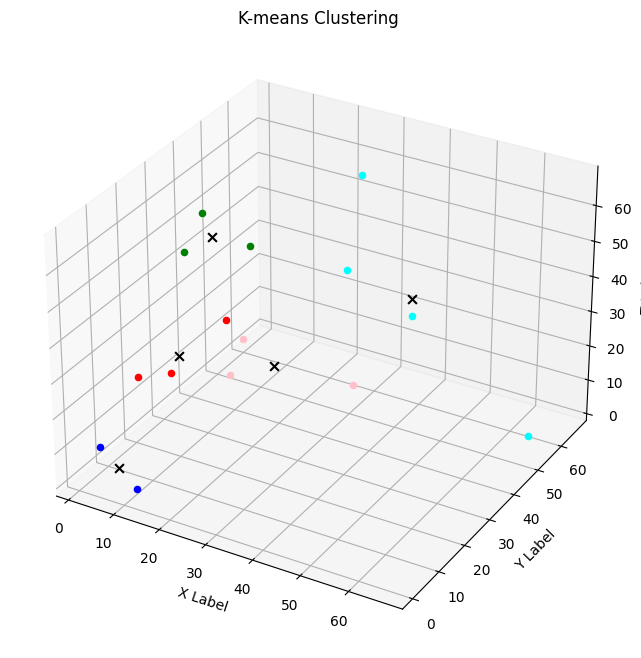

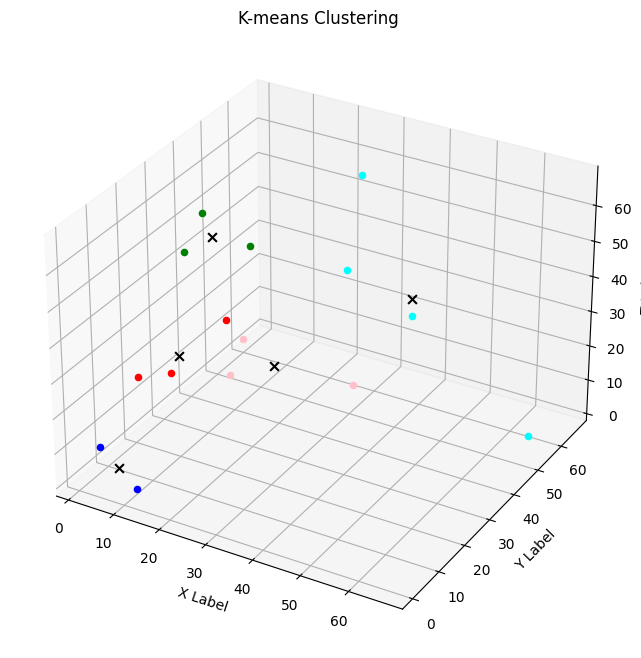

In [ ]:
clusters, centroids = k_means_clustering(xx,yy,zz,k,centroid)